# Analysis on Political Books Network

In this project it has been faced the analysis of a network in which the nodes are books regarding US Politics. We have an heterogenous net with three types of books: conservative, liberal and neutral. Edges represent frequent co-purchasing of books by the same buyers.


## Lybraries

We import all useful lybraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re,io
import json
import numpy
import random
from networkx.algorithms.community import greedy_modularity_communities

## Extracting Data

The file is organized has follows: 

* for every node we have got its _id_ specified as a number, its title and its type defined as "c", "l", "n". An example

```
node
[
  id 0
  label "1000 Years for Revenge"
  value "n"
]
 
```

 
 * for every edge we have got the node from which it starts and the one it arrives. An example
 
```
edge
[
  source 1
  target 0 
]
```

  So we reconstruct the lenguange patterns to let the code extract the important feature.

In [2]:
#reconstructing the lenguange patterns
patternid = r'''\s+id\s+(\d+)''' #for id
patternl = r'''\s+label\s+["]([^"]*)["]\s+''' #for label
patternv = r'''\s+value\s+[(")]\w[(")]\s+''' #for type
patterns = r'''\s+source\s+(\d+)''' #for source
patternt = r'''\s+target\s+(\d+)''' #for target

#compiling all patterns
patid = re.compile(patternid)
patl = re.compile(patternl)
patv = re.compile(patternv)
pats = re.compile(patterns)
patt = re.compile(patternt)

#map type to color
colors = {'"l"\n':'r','"c"\n':'b','"n"\n':'g'}

Now we open the file and extract nodes and edges

In [5]:
#Open nd read the file
with open("polbooks1.txt") as f:
    lines = f.readlines()



#Defining a function to extract link and edges
def parse_adj(file_like_object):
    G = nx.Graph() #graph containing nodes and edges
    global node0, node1, node2 #to extract id, label and type of nodes
    global source, target #to extract sources and targets
    global nodeint, sourceint, targetint #to transform id of nodes and sources and targets of edges into int
    i = 0 #to incorporate every information of a single node/edge, and then fill G, iterating for every node
    n = 0 #to divide the reading of nodes from the edges' one
    for line in lines:
    #for line in node:
     if i < 3:
        if patid.search(line) != None:
                node0 = line.split(" ")[5]
                i = i + 1
                nodeint = int(node0)
        if patl.search(line) != None:
                node1 = line.split(" ")[5]
                i = i + 1
        if patv.search(line) != None:
                node2 = line.split(" ")[5]
                i = i + 1
                n = n + 1
        if pats.search(line) != None:
                source = line.split(" ")[5]
                sourceint = int(source)
                i = i + 1
                n = n + 1
        if patt.search(line) != None:
                target = line.split(" ")[5]
                targetint = int(target)
                i = i + 2
     else: 
        if n < 106:
           G.add_node(nodeint, label=node0, color=colors[node2])
           i = i - 3
        else:
           G.add_edge(sourceint,targetint)
           i = i - 3
    return G

G = parse_adj(f) #inserting file in the function

### Plotting the net

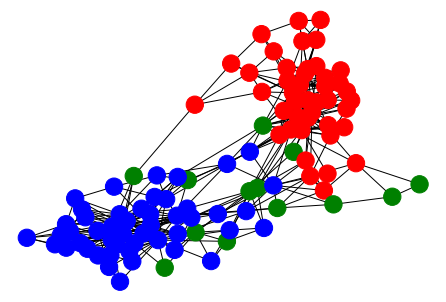

In [6]:
pos = nx.spring_layout(G)
colors = [thing[1] for thing in nx.get_node_attributes(G,'color').items()]
nx.draw(G, node_color=colors)
plt.show()

## Analysis of the net

### Calculating Medium Degree, Diameter, Clustering Coefficient and Assortativity of the Net

In [16]:
#MEDIUM DEGREE
listdeg = []
listfre = list(range(1,27))
totdeg = 0.0
for j in range(0, 105):
    deg = G.degree[j]
    listdeg.append(deg)
    totdeg = totdeg + deg
meddeg = totdeg/104.0
print('Medium Degree: ', meddeg)
Gmeddeg = G.size()/104.0
#print(Gmeddeg)


#DIAMETER
print('Diameter: ', nx.diameter(G, e=None))


#CLUSTERING COEFFICIENT
print('Clustering Coefficient: ', nx.average_clustering(G, nodes=None, weight=None, count_zeros=True))


#ASSORTATIVITY
asso = nx.attribute_assortativity_coefficient(G, 'color')
print('Assortativity: ', asso)

Medium Degree:  8.48076923076923
Diameter:  7
Clustering Coefficient:  0.4875267912317314
Assortativity:  0.7233077584970603


### Plotting the degree distribution and calculating its power-exponent

<ipython-input-8-aa94c095f3b4>:3: RuntimeWarning: divide by zero encountered in power
  y = 1000* x**(-2.2)


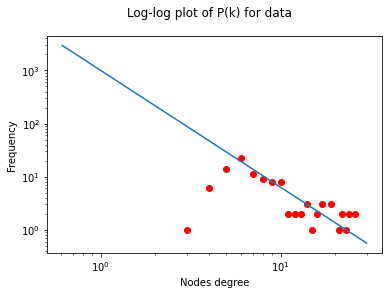

In [8]:
his = nx.degree_histogram(G)
x = numpy.linspace(0, 30)
y = 1000* x**(-2.2)

plt.loglog(listfre, his, 'ro', x, y)
plt.ylabel('Frequency')
plt.xlabel('Nodes degree')
plt.suptitle('Log-log plot of P(k) for data')
plt.show()
plt.close()

### Finding and plotting the division in clusters

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 53, 54, 55, 56]
[28, 30, 31, 59, 60, 61, 62, 63, 66, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]
[50, 51, 52, 58, 64, 65, 67, 68, 69, 85, 103, 104]


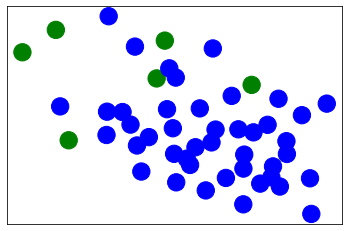

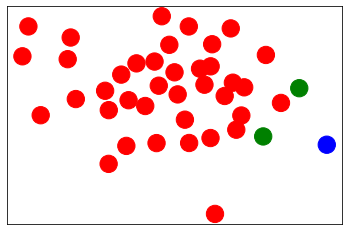

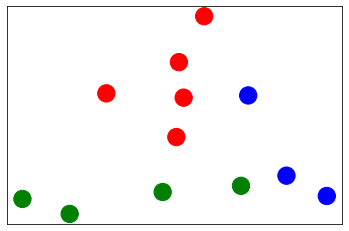

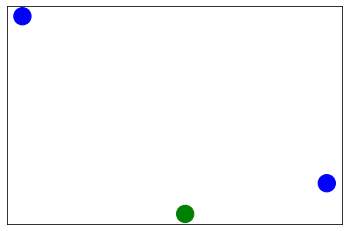

In [9]:
greedmod = list(greedy_modularity_communities(G))
print(sorted(greedmod[0]))
print(sorted(greedmod[1]))
print(sorted(greedmod[2]))
colors2 = []
colors3 = []
greed = list(greedmod[0])
greed2 = list(greedmod[1])

iii = 0

####global col
####global col2

#first cluster
while iii < 49:
    col = greed[iii]
    colors2.append(colors[col])
    iii = iii + 1
nx.draw_networkx_nodes(G, pos, greedmod[0], node_color=colors2)
#nx.draw_networkx_edges(G, pos)
plt.show()
plt.close()

#second cluster
iii=0
while iii < 41:
    col2 = greed2[iii]
    colors3.append(colors[col2])
    iii = iii + 1
nx.draw_networkx_nodes(G, pos, greedmod[1], node_color=colors3)
plt.show()
plt.close()

#third cluster
colors3 = []
greed3 = list(greedmod[2])
iii = 0
#####global col3
while iii < 12:
    col3 = greed3[iii]
    colors3.append(colors[col3])
    iii = iii + 1
nx.draw_networkx_nodes(G, pos, greedmod[2], node_color=colors3)
plt.show()
plt.close()

#fourth cluster
colors4 = []
greed4 = list(greedmod[3])
iii = 0
#####global col4
while iii < 3:
    col4 = greed4[iii]
    colors4.append(colors[col4])
    iii = iii + 1
nx.draw_networkx_nodes(G, pos, greedmod[3], node_color=colors4)
plt.show()
plt.close()

## Recreating and plotting the network

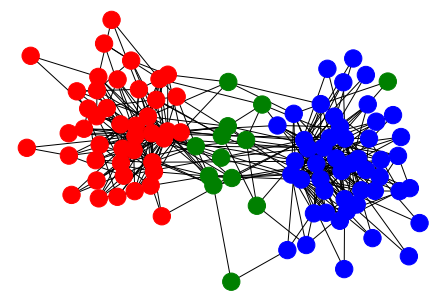

In [20]:
F= nx.Graph()

F.add_nodes_from(G.nodes(data=True))
F.add_edge(0, 1)
kk = 1
global i
while nx.is_connected(F) == False:
   s = random.randint(2,104)
   if F.degree[s] == 0:
     if kk < 6:
        i = 2
        kk = kk + 1
     else:
        i =  random.randint(2,7)
     while F.degree[s] < i:
          r = random.randint(0,104)
          if F.degree[r] != 0:
           if r != s:
            if F.number_of_edges(r, s) == 0:
             global alfa 
             alfa = random.random ()
             alfalfa = (0.01/ F.size())
             if alfa < alfalfa:
                 F.add_edge(r,s)
             else:
                 rand = random.random()
                 if colors[s] != 'g':
                  if colors[r] == colors[s]:
                     prob1 = (F.degree(r)*0.99*0.99/F.size())
                     if rand < prob1:
                         F.add_edge(r,s)
                  elif colors[r] == 'g':
                     prob2 = (F.degree(r)*0.009*0.99/F.size())
                     if rand < prob2:
                         F.add_edge(r,s)
                  else:
                     prob3 = (F.degree(r)*0.001*0.99/F.size())
                     if rand < prob3:
                         F.add_edge(r,s)
                 else:
                    if colors[r] == colors[s]:
                     prob1 = (F.degree(r)*0.6*0.99/F.size())
                     if rand < prob1:
                         F.add_edge(r,s)
                    else:
                     prob2 = (F.degree(r)*0.4*0.99/F.size())
                     if rand < prob1:
                         F.add_edge(r,s)


nx.draw(F, node_color=colors)
plt.show()    
plt.close()

### Calculating the quantities defining the net

Medium Degree, Diameter, Clustering Coefficient and Assortativity of the reconstructed Net. Moreover plot of the degree distribution and calculation of its power-exponent

Medium Degree:  8.442307692307692
Diameter:  5
Clustering Coefficient:  0.31959473462125865
Assortativity:  0.7476735274797461


<ipython-input-21-744c4ec0ff2f>:18: RuntimeWarning: divide by zero encountered in power
  y = 900* x**(-2.2)


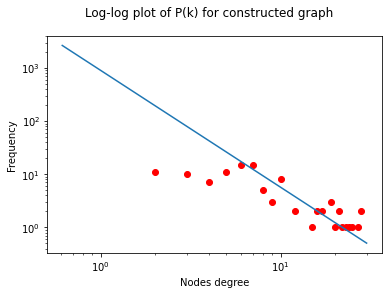

In [21]:
#MEDIUM DEGREE
Fmeddeg = F.size()/104.0
print('Medium Degree: ', Fmeddeg*2)

#DIAMETER
print('Diameter: ', nx.diameter(F, e=None))

#CLUSTERING COEFFICIENT
print('Clustering Coefficient: ', nx.average_clustering(F, nodes=None, weight=None, count_zeros=True))

#ASSORTATIVITY
asso2 = nx.attribute_assortativity_coefficient(F, 'color')
print('Assortativity: ', asso2)


#Plotting the degree distribution and calculating its power-exponent
x = numpy.linspace(0, 30)
y = 900* x**(-2.2)
hisF = nx.degree_histogram(F)
listfreF = list(range(0,len(hisF))) 
plt.loglog(listfreF, hisF, 'ro', x, y)
plt.ylabel('Frequency')
plt.xlabel('Nodes degree')
plt.suptitle('Log-log plot of P(k) for constructed graph')
plt.show()
plt.close()